# Hawks
## Kevin Greenberg
 The Hawks dataset consists of three types of hawks (Red-tailed, Sharp-skinned, and Cooper's), with various features for each hawk. The dataset has 908 hawks with 20 columns. A supervised _______ was conducted to classify the hawks.
 
 Data was preprocessed _______-
 
 Then split into training and test data
 
 Then ran
 
 Visualized
 
 Explained
 
 https://pbpython.com/categorical-encoding.html

In [1]:
# Load the data
import pandas as pd

df_hawks = pd.read_csv('/Users/kevingreenberg/Desktop/ML/data/hawks.csv', na_values="")
df_hawks.columns=['Count','Month', 'Day', 'Year','Capture Time', 'Release Time', 'Band Number','Species', 'Age', 'Sex', 'Wing','Weight', 'Culmen', 'Hallux', 'Tail', 'Standard Tail', 'Tarsus', 'WingPitFat', 'KeelFat', 'Crop']
df_hawks.tail()

,Count,Month,Day,Year,Capture Time,Release Time,Band Number,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,Standard Tail,Tarsus,WingPitFat,KeelFat,Crop
903,904,11,18,2003,14:44,,1177-04777,RT,I,NaN,380.0,1525.0,26.0,27.6,224,227.0,NaN,NaN,3.0,0.0
904,905,11,19,2003,10:18,,803-05985,SS,I,F,190.0,175.0,12.7,15.4,150,153.0,NaN,NaN,4.0,0.0
905,906,11,19,2003,12:02,,1807-53145,RT,I,NaN,360.0,790.0,21.9,27.6,211,215.0,NaN,NaN,2.0,0.0
906,907,11,20,2003,9:56,,1177-04778,RT,I,NaN,369.0,860.0,25.2,28.0,207,210.0,NaN,NaN,2.0,0.0
907,908,11,20,2003,13:30,,1207-53145,RT,A,NaN,199.0,1290.0,28.7,32.1,222,226.0,NaN,NaN,1.0,0.0


In [2]:
df_hawks.info()
# There is missing data and our target feature(species) is in the wrong class.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
Count            908 non-null int64
Month            908 non-null int64
Day              908 non-null int64
Year             908 non-null int64
Capture Time     908 non-null object
Release Time     907 non-null object
Band Number      908 non-null object
Species          908 non-null object
Age              908 non-null object
Sex              332 non-null object
Wing             907 non-null float64
Weight           898 non-null float64
Culmen           901 non-null float64
Hallux           902 non-null float64
Tail             908 non-null int64
Standard Tail    571 non-null float64
Tarsus           75 non-null float64
WingPitFat       77 non-null float64
KeelFat          567 non-null float64
Crop             565 non-null float64
dtypes: float64(9), int64(5), object(6)
memory usage: 142.0+ KB


In [3]:
df_hawks["Species"].value_counts()
# we also have unequal numbers of each species

RT    577
SS    261
CH     70
Name: Species, dtype: int64

In [4]:
# count NAN in columns of interest
df_hawks['Species'].isnull().sum()


0

In [5]:
# the first method of encoding cateogrical data
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_hawks["Species_code"] = lb_make.fit_transform(df_hawks["Species"])
df_hawks[["Species", "Species_code"]].head()

,Species,Species_code
0,RT,1
1,RT,1
2,RT,1
3,CH,0
4,SS,2


In [6]:
#the second method encoding categorical data
df_hawks["Species"] = df_hawks["Species"].astype('category')

df_hawks.dtypes

Count               int64
Month               int64
Day                 int64
Year                int64
Capture Time       object
Release Time       object
Band Number        object
Species          category
Age                object
Sex                object
Wing              float64
Weight            float64
Culmen            float64
Hallux            float64
Tail                int64
Standard Tail     float64
Tarsus            float64
WingPitFat        float64
KeelFat           float64
Crop              float64
Species_code        int64
dtype: object

# Mean imputation

In [7]:
df_hawks.fillna(df_hawks.mean())

,Count,Month,Day,Year,Capture Time,Release Time,Band Number,Species,Age,Sex,...,Weight,Culmen,Hallux,Tail,Standard Tail,Tarsus,WingPitFat,KeelFat,Crop,Species_code
0,1,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,...,920.0,25.700000,30.100000,219,199.182137,71.950667,0.792208,2.184303,0.23454,1
1,2,9,22,1992,10:30,,877-76318,RT,I,NaN,...,930.0,21.801498,26.410865,221,199.182137,71.950667,0.792208,2.184303,0.23454,1
2,3,9,23,1992,12:45,,877-76319,RT,I,NaN,...,990.0,26.700000,31.300000,235,199.182137,71.950667,0.792208,2.184303,0.23454,1
3,4,9,23,1992,10:50,,745-49508,CH,I,F,...,470.0,18.700000,23.500000,220,199.182137,71.950667,0.792208,2.184303,0.23454,0
4,5,9,27,1992,11:15,,1253-98801,SS,I,F,...,170.0,12.500000,14.300000,157,199.182137,71.950667,0.792208,2.184303,0.23454,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,904,11,18,2003,14:44,,1177-04777,RT,I,NaN,...,1525.0,26.000000,27.600000,224,227.000000,71.950667,0.792208,3.000000,0.00000,1
904,905,11,19,2003,10:18,,803-05985,SS,I,F,...,175.0,12.700000,15.400000,150,153.000000,71.950667,0.792208,4.000000,0.00000,2
905,906,11,19,2003,12:02,,1807-53145,RT,I,NaN,...,790.0,21.900000,27.600000,211,215.000000,71.950667,0.792208,2.000000,0.00000,1
906,907,11,20,2003,9:56,,1177-04778,RT,I,NaN,...,860.0,25.200000,28.000000,207,210.000000,71.950667,0.792208,2.000000,0.00000,1


In [8]:
df_hawks1 = df_hawks.fillna(df_hawks.mean())

In [9]:
df_hawks1.head()

,Count,Month,Day,Year,Capture Time,Release Time,Band Number,Species,Age,Sex,...,Weight,Culmen,Hallux,Tail,Standard Tail,Tarsus,WingPitFat,KeelFat,Crop,Species_code
0,1,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,...,920.0,25.700000,30.100000,219,199.182137,71.950667,0.792208,2.184303,0.23454,1
1,2,9,22,1992,10:30,,877-76318,RT,I,NaN,...,930.0,21.801498,26.410865,221,199.182137,71.950667,0.792208,2.184303,0.23454,1
2,3,9,23,1992,12:45,,877-76319,RT,I,NaN,...,990.0,26.700000,31.300000,235,199.182137,71.950667,0.792208,2.184303,0.23454,1
3,4,9,23,1992,10:50,,745-49508,CH,I,F,...,470.0,18.700000,23.500000,220,199.182137,71.950667,0.792208,2.184303,0.23454,0
4,5,9,27,1992,11:15,,1253-98801,SS,I,F,...,170.0,12.500000,14.300000,157,199.182137,71.950667,0.792208,2.184303,0.23454,2


# subset data to keep the main features of interest.
These are the features that have low NA's (< 1%, while the rest have NA's between 37% & 92%)

In [10]:
df_hawks1 = df_hawks1.loc[:, ['Wing', 'Weight', 'Culmen', 'Hallux', 'Species_code']]

In [11]:
df_hawks1.head()

,Wing,Weight,Culmen,Hallux,Species_code
0,385.0,920.0,25.700000,30.100000,1
1,376.0,930.0,21.801498,26.410865,1
2,381.0,990.0,26.700000,31.300000,1
3,265.0,470.0,18.700000,23.500000,0
4,205.0,170.0,12.500000,14.300000,2


# split the data into training and test

In [12]:
from sklearn.model_selection import train_test_split

X, y = df_hawks1.iloc[:,1:].values, df_hawks1.iloc[:,4].values

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size = 0.1, random_state = 0, stratify=y)

In [13]:
import numpy as np
#to test the stratify = y 
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [ 70 577 261]
Labels counts in y_train: [ 63 519 235]
Labels counts in y_test: [ 7 58 26]


In [14]:
#Standardize the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# KNN algorithm

In [15]:
#plot setup
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X,y,classifier, test_idx=None,
                         resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')
    
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3, p=2,
                        metric='minkowski') #Euclidean distance which happens when metric='minkowski' and p=2. If p=1 then it would be Manhattan distance. Also this estimates 5 classes.
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [17]:
from sklearn.metrics import confusion_matrix
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
# we see 4 misclassifications

[[ 6  0  1]
 [ 1 57  0]
 [ 1  1 24]]


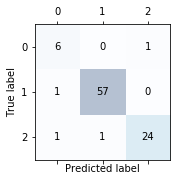

In [18]:
# or present in a pretty plot
# a pretty plot
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
     for j in range(confmat.shape[1]):
         ax.text(x=j, y=i,
                 s=confmat[i, j],
                 va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### We have an accuracy of 95.60% with the KNN model. this is slightly worse than the KNN in R, which had an accuracy of 98.80. The difference is most likely due to different estimation methods between the softwares

In [19]:
from mlxtend.evaluate import accuracy_score
accuracy_score(y_test, y_pred)

0.9560439560439561

# Decision tree model with Gini impurity
Gini impurity and entropy(scaled) are almost identical in practice for basing decisions purity(homogeneity) of each leaf(node)( there is alos the information gain which is somewhat like the opposite of impurity. We want to maximize the infromation gain and minimize the impurity at each decision. Misclassification is the different one, it is best used for PRUNING but NOT for building a tree. See below plot

Text(0, 0.5, 'impurity index')

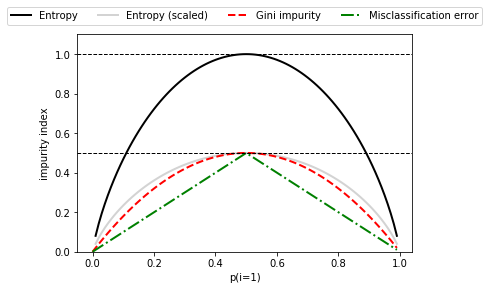

In [20]:
>>> import matplotlib.pyplot as plt
>>> import numpy as np
>>> def gini(p):
...     return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
>>> def entropy(p):
...     return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
>>> def error(p):
...     return 1 - np.max([p, 1 - p])
>>> x = np.arange(0.0, 1.0, 0.01)
>>> ent = [entropy(p) if p != 0 else None for p in x]
>>> sc_ent = [e*0.5 if e else None for e in ent]
>>> err = [error(i) for i in x]
>>> fig = plt.figure()
>>> ax = plt.subplot(111)
>>> for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
...                           ['Entropy', 'Entropy (scaled)',
...                            'Gini impurity',
...                            'Misclassification error'],
...                           ['-', '-', '--', '-.'],
...                           ['black', 'lightgray',                           
                               'red', 'green', 'cyan']):
...     line = ax.plot(x, i, label=lab,
...                   linestyle=ls, lw=2, color=c)
>>> ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
...           ncol=5, fancybox=True, shadow=False)
>>> ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
>>> ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
>>> plt.ylim([0, 1.1])
>>> plt.xlabel('p(i=1)')
>>> plt.ylabel('impurity index')

## Run the Decision tree model

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion = 'gini', #could use 'entropy' instead
                                   max_depth = 3,
                                   random_state=1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

## Build the Decision trees

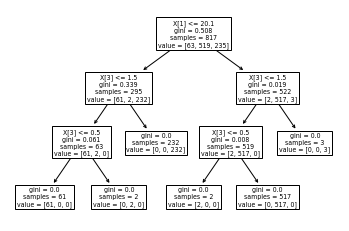

In [22]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()
# The simple Decision tree 

In [25]:
#conda install graphviz

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [26]:
#conda install python-graphviz

Solving environment: done

## Package Plan ##

  environment location: /Users/kevingreenberg/opt/anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-graphviz-0.14       |             py_0          25 KB
    ------------------------------------------------------------
                                           Total:          25 KB

The following NEW packages will be INSTALLED:

  python-graphviz    pkgs/main/noarch::python-graphviz-0.14-py_0



python-graphviz-0.14 | 25 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


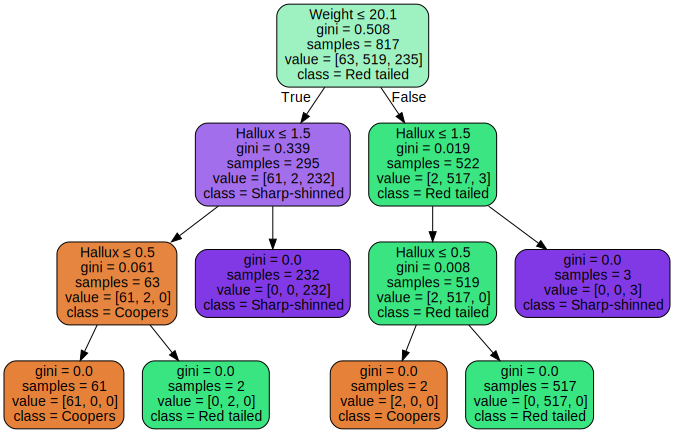

In [35]:
import graphviz 
dot_data = tree.export_graphviz(tree_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("df_hawks1")
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                      feature_names=['Wing', 'Weight', 'Culmen', 'Hallux'],  
                      class_names=['Coopers', 'Red tailed', 'Sharp-shinned'],
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph
# The Easy to interpret Decision tree. We see the Weight & Hallux are the main features used. 
# This varies from decision tree in R, as Culmen and Hallux were the main features.
# My interpretation is to use Weight, Hallux, and Culmen as the main features and be wary of overfit. 

## Evaluate the model accuracy and confusion matrix

In [36]:
y_pred = tree_model.predict(X_test)

In [38]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Accuracy is 100%

Accuracy: 1.0


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 7,  0,  0],
       [ 0, 58,  0],
       [ 0,  0, 26]])

# Comparing Decision tree to AdaBoost model

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',
                               random_state=1,
                               max_depth=3) 
ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500,
                         learning_rate=0.1,
                         random_state=1)

In [45]:
# this is the performance of a single decision tree stump as seen above by max_depth=1. NO boosting
from sklearn.metrics import accuracy_score
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))
# We see perfect training and test performance  

Decision tree train/test accuracies 1.000/1.000


In [48]:
# this is an example of decision tree WITH boosting
# difference is tree.fit vs bag.fit
from sklearn.metrics import accuracy_score
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))
# We see perfect training and test performance  

AdaBoost train/test accuracies 1.000/1.000


### Both the decision tree and AdaBoost model have the same accuracy, therefore we most likely would use the decision tree as it is less computationaly expensive

## Bagging

In [51]:
#run the bagging with a tree classifier and entropy is evaluator, with 500 boostrapped samples, 1 CPU, and random_state makes the results repeatable
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=tree,
                         n_estimators=500,
                         max_samples=1.0,
                         max_features=1.0,
                         bootstrap=True,
                         bootstrap_features=False,
                         n_jobs=1,
                         random_state=1)


In [53]:
# this is an example of decision tree WITH bagging
# difference is tree.fit vs bag.fit
from sklearn.metrics import accuracy_score
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f' % (bag_train, bag_test))
# We see perfect training and test performance again.

Bagging train/test accuracies 1.000/1.000


In [54]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                               n_estimators=25,
                               random_state=1,
                               n_jobs=2)
#we ran 25 decision trees, and n_jobs told the computer to use 2 core processors to run the model. Useful for larger data

forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [55]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
forest_train = accuracy_score(y_train, y_train_pred)
forest_test = accuracy_score(y_test, y_test_pred)
print('Forest train/test accuracies %.3f/%.3f' % (forest_train, forest_test))
# We see perfect training and test performance again.

Forest train/test accuracies 1.000/1.000


# SVM

In [64]:
from sklearn.svm import SVC
svm= SVC(kernel = 'linear', C = 1.0, random_state=1) #C = 1 and random_state is so results are reproducible. Could change gamma(default = 3) but with perfect fit, there's no need to tune more parameters
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [66]:
y_train_pred = svm.predict(X_train_std)
y_test_pred = svm.predict(X_test_std)
svm_train = accuracy_score(y_train, y_train_pred)
svm_test = accuracy_score(y_test, y_test_pred)
print('SVM train/test accuracies %.3f/%.3f' % (svm_train, svm_test))
# we see perfect fit again, and this can be seen with both the linear kernel and rbf kernel

SVM train/test accuracies 1.000/1.000


# get better model evaluation other than accuracy. 